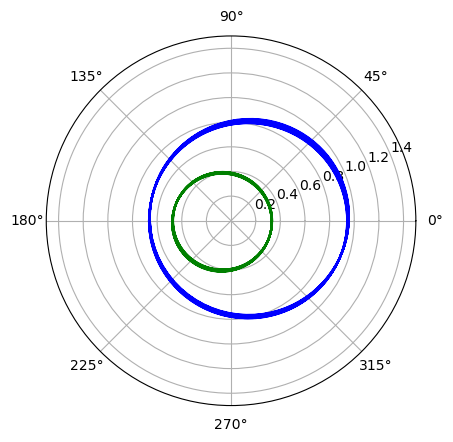

In [239]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib import animation
from matplotlib.animation import PillowWriter

ME = 1.9891e30 # Mass of Sun in kilograms
R = 1.496e11 # 1 AU
T = 3.156e7 # Number of seconds in 1 year
G = 6.6743e-11*ME*T**2/R**3 # Gravitational Constant in terms of Earth Masses, Astronomical Units, and Years
PI = np.pi

# System of equations to solve
def dSdt (t, S):
    r, theta, v = S
    return [v, L/(mu*r**2), L**2/(mu**2*r**3)-G*(m1+m2)/r**2]

# Initial Conditions
m1 = 2 # Mass of Star 1 in Solar Masses
m2 = 1 # Mass of Star 2 in Solar Masses
mu = m1*m2/(m1+m2) # Reduced mass of the system
r0 = 1 # Intial distance between Body 1 and Body 2
vr0 = 0 # Initial rate of change of distance between Body 1 and Body 2
theta0 = 0 # Initial angle
L = 2.5*PI # Total Angular Momentum of System

max_t = 10
dimen = 1.5 # Max radius of polar plot
frames = 1000 # Number of frames in video

times = np.linspace(0, max_t, frames)
sol = solve_ivp(dSdt, (0, max_t), [r0, theta0, vr0], t_eval = times)
t, r, theta1 = sol.t, sol.y[0], sol.y[1]
r1 = m2*r/(m1+m2)
r2 = m1*r/(m1+m2)
theta2 = theta1+PI
plt.polar(theta1, r1, color="green")
plt.polar(theta2, r2, color="blue")
plt.gca().set_ylim(0,dimen)
plt.show()

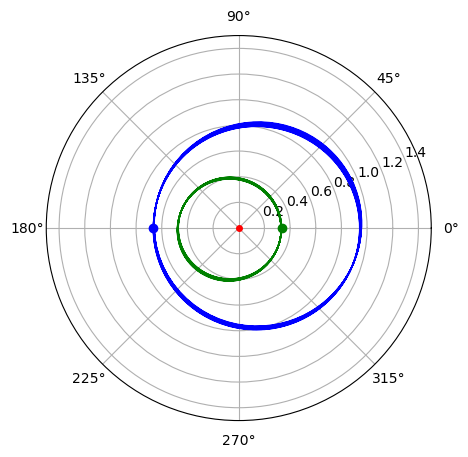

In [240]:
def animate (i):
    body1.set_data([theta1[i]], [r1[i]])
    traceTheta1.append(theta1[i])
    traceR1.append(r1[i])
    trace1.set_data([traceTheta1], [traceR1])
    body2.set_data([theta2[i]], [r2[i]])
    traceTheta2.append(theta2[i])
    traceR2.append(r2[i])
    trace2.set_data([traceTheta2], [traceR2])

fig, ax = plt.subplots(1, 1, figsize=(5,5), subplot_kw={'projection': 'polar'})
ax.set_ylim(0, dimen)
plt.plot(0, 0, "ro", markersize=4)
traceR1 = []
traceTheta1 = []
traceR2 = []
traceTheta2 = []
trace1, = plt.polar(traceTheta1, traceR1, lw=1, color="green")
body1, = plt.polar([], [], "go", lw=3, markersize=6)
trace2, = plt.polar(traceTheta2, traceR2, lw=1, color="blue")
body2, = plt.polar([], [], "bo", lw=3, markersize=6)
ani = animation.FuncAnimation(fig, animate, frames=frames, interval=25)
ani.save("concentric orbits.gif", writer='pillow', fps=30)